In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [157]:
from sklearn.datasets import load_iris

iris = load_iris()

In [158]:
X = iris.data
y = iris.target 
names = iris.target_names

In [159]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Engineering

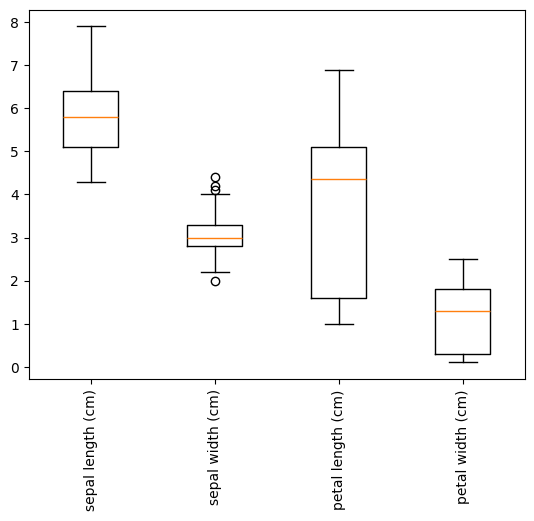

In [161]:
plt.boxplot(X)
plt.xticks(ticks=[1,2,3,4],labels = iris.feature_names, rotation=90)
plt.show()

In [162]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [163]:
param_grid = {'C':[1, 10, 100, 1000], 
              'gamma':[1,0.1, 0.001, 0.0001],
              'kernel':['rbf', 'sigmoid','poly']}

In [164]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=3)

In [166]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.25, random_state=42)

In [168]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.375 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=3)

In [169]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [170]:
y_pred = grid.predict(X_test)

In [171]:
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.94      1.00      0.97        34
           2       1.00      0.95      0.97        37

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113

0.9823008849557522
[[42  0  0]
 [ 0 34  0]
 [ 0  2 35]]
